# Maskin Læring: Klassifisering av dyr

## Trening av vårt første CNN!
![l](https://www.managers.org.uk/wp-content/uploads/2020/03/BrainTraining.jpg)  
I denne notebooken kommer vi til å gjøre et par ting: 
1. Skrive inn studentnummeret vårt
2. Generere et nevralt nettverk(tenk en hjerne) med dette studentnummeret. 
3. Trene dette nettverket

Først så setter vi inn student nummeret vårt.

In [1]:
import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import classification_report, log_loss, accuracy_score
from sklearn.model_selection import train_test_split
!pip3 install tqdm
from tqdm.auto import tqdm

fish: Unknown command: pip3
fish: 
pip3 install tqdm
^


### La oss nå gå inn på kaggle, hente ut api nøkkelen  vår, og legge den inn under.
### Dette gjør sånn at vi kan bruke datasettet som finnes på kaggle.

In [17]:
kaggle_user= "uzaaft"
kaggle_api = "eef66e4e79f6db8c868a369edc57500c"
os.environ["KAGGLE_USERNAME"] = kaggle_user
os.environ["KAGGLE_KEY"] = kaggle_api
!pip3 install kaggle
!kaggle datasets download -d alessiocorrado99/animals10

fish: Unknown command: pip3
fish: 
pip3 install kaggle
^
animals10.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
!unzip -q animals10.zip

replace raw-img/cane/OIF-e2bexWrojgtQnAPPcUfOWQ.jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


In [4]:
import random
Student_nr = input("Hva er student nummeret ditt?")
img_size = 100
random.seed(Student_nr)

activation_layers = [
            "relu",
            "sigmoid",
            "softmax",
            "softplus",
            "softsign",
            "tanh",
            "selu",
            "elu",
            "exponential",
]
n = random.randint(1, len(activation_layers))
layer = activation_layers[n]
lr = random.uniform(1e-4, 1e-1)
print(f"Your learning rate is: {lr}")
print(f"Your activation layer is: {layer}")

Hva er student nummeret ditt? 104346


Your learning rate is: 0.056679769480336546
Your activation layer is: selu


In [5]:
base_dir = './raw-img'
LABELS = os.listdir(base_dir)
LABELS.sort()
translate = {"cane": "dog", "cavallo": "horse", "elefante": "elephant",
                 "farfalla": "butterfly", "gallina": "chicken", "gatto": "cat",
                 "mucca": "cow", "pecora": "sheep", "scoiattolo": "squirrel",
                 "dog": "cane", "cavallo": "horse", "elephant" : "elefante", 
                 "butterfly": "farfalla", "chicken": "gallina", "cat": "gatto",
                 "cow": "mucca", "spider": "ragno", "squirrel": "scoiattolo"}
LABELS_english = list(translate.values())
base_dir + '/' + LABELS[0]
dataset=[]
testset=[]
count=0

for label in tqdm(LABELS):
    i=0
#     path = base_dir + '/' + label
    path = os.path.join(base_dir, label)
#     print(path)
    for img in os.listdir(path):
#         print(img)
        image=load_img(os.path.join(path, img),
                       grayscale=False, color_mode='rgb', 
                       target_size=(img_size,img_size))
        image=img_to_array(image)
        image=image/255.0
        if i<1000:
            dataset.append([image,count])
            i+=1
        else:
            testset.append([image,count])
    count=count+1

X,y =zip(*dataset)
test, test_labels=zip(*testset)
y = to_categorical(y)
y=np.array(y)
X=np.array(X)
print("Train Shape:{}\nTrain Labels shape: {}".format(X.shape,y.shape))
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=99)

datagen = ImageDataGenerator(
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=20,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.1,
    fill_mode="nearest"
)

  0%|          | 0/10 [00:00<?, ?it/s]

Train Shape:(10000, 100, 100, 3)
Train Labels shape: (10000, 10)


In [6]:
def predict_image(image):
    image=img_to_array(image)/255 
    prediction_image=np.array(image)
    prediction_image= np.expand_dims(image, axis=0)
    
    pred = model.predict(prediction_image)
    value = np.argmax(pred)
    return f"Pred: {LABELS_english[value]}"

In [7]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(16, (3, 3), activation=layer, input_shape=(img_size, img_size, 3), padding= "valid"))
model.add(tf.keras.layers.MaxPooling2D(3))

model.add(tf.keras.layers.Conv2D(32, (3, 3), activation=layer, padding= "valid"))
model.add(tf.keras.layers.MaxPooling2D(2))

model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Conv2D(64, (3, 3), activation=layer, padding= "valid"))
model.add(tf.keras.layers.MaxPooling2D(1))


model.add(tf.keras.layers.Conv2D(64, (3, 3), activation=layer, padding= "valid"))
model.add(tf.keras.layers.MaxPooling2D(1))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(64, activation=layer))
model.add(tf.keras.layers.Dense(32, activation=layer))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))



model.add(tf.keras.layers.Dense(10, activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy',
             optimizer=tf.keras.optimizers.Adam(learning_rate = lr),
             metrics=['acc'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 batch_normalization (BatchN  (None, 15, 15, 32)       128       
 ormalization)                                                   
                                                        

2021-11-23 13:21:16.252757: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-23 13:21:16.253213: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-23 13:21:16.271939: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-23 13:21:16.272329: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-23 13:21:16.272589: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from S

### I cellen ovenfor lager vi modellen. Vi prøver å gjette hvilket dyr det er på bildene med denne ulærte modellen

2021-11-23 13:21:17.233961: I tensorflow/stream_executor/cuda/cuda_dnn.cc:366] Loaded cuDNN version 8204
2021-11-23 13:21:17.386865: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2021-11-23 13:21:17.387332: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2021-11-23 13:21:17.387350: W tensorflow/stream_executor/gpu/asm_compiler.cc:80] Couldn't get ptxas version string: INTERNAL: Couldn't invoke ptxas --version
2021-11-23 13:21:17.387798: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2021-11-23 13:21:17.387830: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] INTERNAL: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


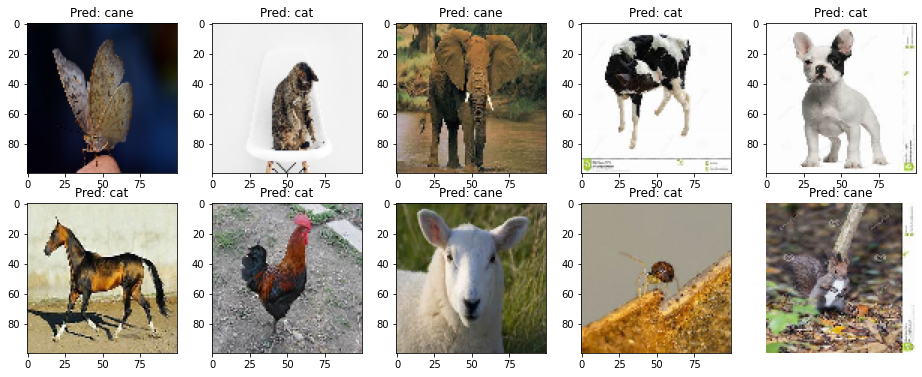

In [8]:
image_dir = "raw-img"
sub_dirs = os.listdir(image_dir)
image_paths = []
complete_paths = []
for sub_dir in sub_dirs:
    image_path = os.listdir(f"{image_dir}/{sub_dir}")[0]
    complete_paths.append(f"{image_dir}/{sub_dir}/{image_path}")

plt.figure(figsize = (16,16))
for i in range(0,10):
    image=load_img(complete_paths[i],target_size=(img_size,img_size))
    prediction = predict_image(image)
    plt.subplot(5,5,i+1)    # the number of images in the grid is 5*5 (25)
    plt.title(prediction)
    plt.imshow(image)
plt.axis("off")
plt.show()

In [9]:
history = model.fit(
     datagen.flow(X_train, y_train, batch_size=256), 
    validation_data = (X_valid, y_valid),
    epochs=25
)

Epoch 1/25
32/32 [==============================] - 9s 256ms/step - loss: 2.3832 - acc: 0.1211 - val_loss: 20.3279 - val_acc: 0.1020
Epoch 2/25
32/32 [==============================] - 8s 251ms/step - loss: 2.2254 - acc: 0.1659 - val_loss: 12.4736 - val_acc: 0.1015
Epoch 3/25
32/32 [==============================] - 8s 250ms/step - loss: 2.1664 - acc: 0.1959 - val_loss: 5.2919 - val_acc: 0.1025
Epoch 4/25
32/32 [==============================] - 8s 254ms/step - loss: 2.1240 - acc: 0.2153 - val_loss: 5.1846 - val_acc: 0.1060
Epoch 5/25
32/32 [==============================] - 8s 255ms/step - loss: 2.0802 - acc: 0.2315 - val_loss: 3.2926 - val_acc: 0.1310
Epoch 6/25
32/32 [==============================] - 8s 251ms/step - loss: 2.0766 - acc: 0.2422 - val_loss: 4.3320 - val_acc: 0.1285
Epoch 7/25
32/32 [==============================] - 8s 254ms/step - loss: 2.0311 - acc: 0.2619 - val_loss: 1.9753 - val_acc: 0.2925
Epoch 8/25
32/32 [==============================] - 8s 251ms/step - loss: 

### La oss se hvor bra modellen vår gjetter

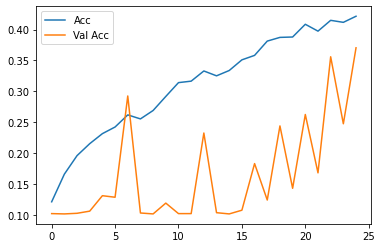

In [10]:
plt.plot(history.history['acc'], label = "Acc")
plt.plot(history.history['val_acc'], label = "Val Acc")
plt.legend()
plt.show()

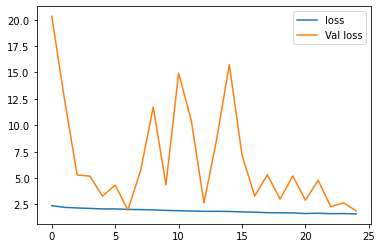

In [11]:
plt.plot(history.history['loss'], label = "loss")
plt.plot(history.history['val_loss'], label = "Val loss")
plt.legend()
plt.show()

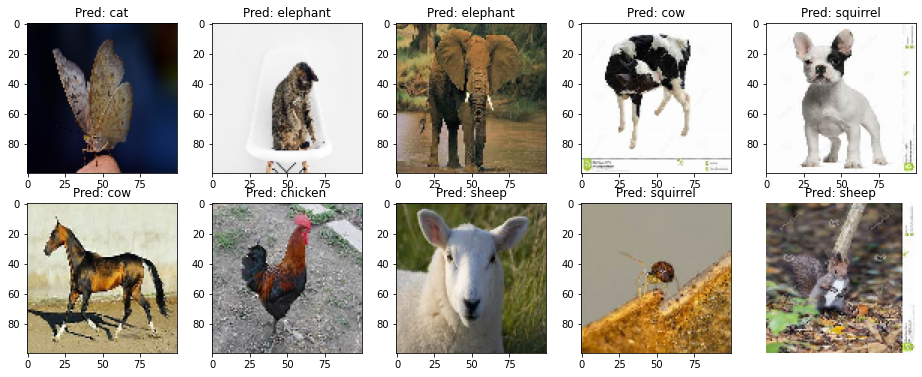

In [12]:
image_dir = "raw-img"
sub_dirs = os.listdir(image_dir)
image_paths = []
complete_paths = []
for sub_dir in sub_dirs:
    image_path = os.listdir(f"{image_dir}/{sub_dir}")[0]
    complete_paths.append(f"{image_dir}/{sub_dir}/{image_path}")

plt.figure(figsize = (16,16))
for i in range(0,10):
    image=load_img(complete_paths[i],target_size=(img_size,img_size))
    prediction = predict_image(image)
    plt.subplot(5,5,i+1)    # the number of images in the grid is 5*5 (25)
    plt.title(prediction)
    plt.imshow(image)
plt.axis("off")
plt.show()

In [13]:
history = model.fit(
     datagen.flow(X_train, y_train, batch_size=256), 
    validation_data = (X_valid, y_valid),
    epochs=100, 
    initial_epoch = 25
)

Epoch 26/100
32/32 [==============================] - 8s 256ms/step - loss: 1.5699 - acc: 0.4347 - val_loss: 2.7105 - val_acc: 0.2550
Epoch 27/100
32/32 [==============================] - 8s 255ms/step - loss: 1.5447 - acc: 0.4441 - val_loss: 3.1905 - val_acc: 0.2485
Epoch 28/100
32/32 [==============================] - 8s 249ms/step - loss: 1.5670 - acc: 0.4415 - val_loss: 2.1771 - val_acc: 0.3625
Epoch 29/100
32/32 [==============================] - 8s 246ms/step - loss: 1.5147 - acc: 0.4563 - val_loss: 2.2466 - val_acc: 0.3115
Epoch 30/100
32/32 [==============================] - 8s 254ms/step - loss: 1.5061 - acc: 0.4627 - val_loss: 2.6646 - val_acc: 0.2540
Epoch 31/100
32/32 [==============================] - 8s 249ms/step - loss: 1.5260 - acc: 0.4590 - val_loss: 2.3266 - val_acc: 0.3250
Epoch 32/100
32/32 [==============================] - 8s 252ms/step - loss: 1.5046 - acc: 0.4663 - val_loss: 1.7527 - val_acc: 0.4250
Epoch 33/100
32/32 [==============================] - 8s 251ms

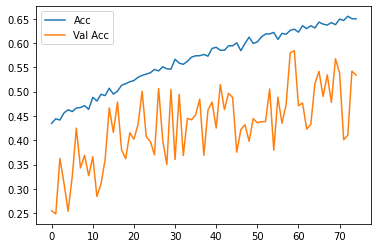

In [14]:
plt.plot(history.history['acc'], label = "Acc")
plt.plot(history.history['val_acc'], label = "Val Acc")
plt.legend()
plt.show()

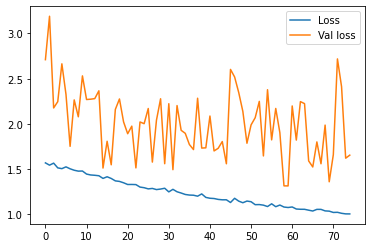

In [15]:
plt.plot(history.history['loss'],  label = "Loss")
plt.plot(history.history['val_loss'],  label = "Val loss")
plt.legend()
plt.show()

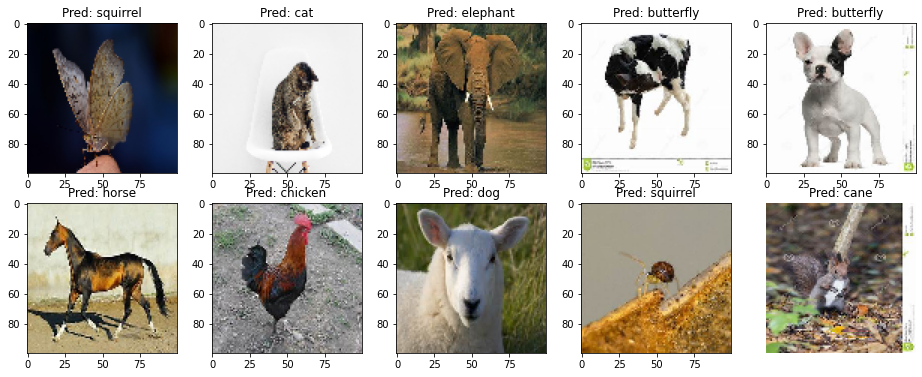

In [16]:
image_dir = "raw-img"
sub_dirs = os.listdir(image_dir)
image_paths = []
complete_paths = []
for sub_dir in sub_dirs:
    image_path = os.listdir(f"{image_dir}/{sub_dir}")[0]
    complete_paths.append(f"{image_dir}/{sub_dir}/{image_path}")

plt.figure(figsize = (16,16))
for i in range(0,10):
    image=load_img(complete_paths[i],target_size=(img_size,img_size))
    prediction = predict_image(image)
    plt.subplot(5,5,i+1)    # the number of images in the grid is 5*5 (25)
    plt.title(prediction)
    plt.imshow(image)
plt.axis("off")
plt.show()